TASK:
Deadline: 10 martie ora 23:59.
Formular pentru trimiterea temei: https://forms.gle/kMcWxv8e39wwXy1W7.
Folosind datasetul urmator, https://github.com/ancatache/LaRoSeDa/tree/main/data - o colectie de review-uri pentru produse in romana, rezolvati urmatoarele cerinte:

In [1]:
from sys import platform, path
if platform == "linux" or platform == "linux2":
    path.append('/home/dariusbuhai/python/lib/python3.9/site-packages')
import json
import spacy
from nltk.stem.snowball import SnowballStemmer

nlp = spacy.load("ro_core_news_sm")
stemmer = SnowballStemmer(language='romanian')

In [2]:
with open("data/negative_reviews.json", "r") as nrf:
    negative_reviews = json.loads(nrf.read())
with open("data/positive_reviews.json", "r") as prf:
    positive_reviews = json.loads(prf.read())

1) Curatati si normalizati corpus-ul aplicand urmatoarele operatiii:
  a) afisati caracterele diferite de literele mici ale alfabetului englez
  b) transformati numerele in cuvinte folosind num2words
  c) eliminati linkurile si alte referinte
  d) curatati-l de semnele de punctuatie
  e) impartiti textele in cuvinte (tokens), va recomandam sa folositi spacy incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)
  f) eliminati stopwords
  g) aplicati stemming
  h) aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g, afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.
  i) cautati top 20 trigrame (collocations)

In [3]:
from lab_2.homework import analyse_reviews
all_positive_words, all_steamed_positive_words, positive_reviews_tokens = analyse_reviews(positive_reviews['reviews'])

Top 15 cuvinte cu stemul diferit de lema: 
 ['compatibilitatea', 'imposibilitatea', 'compatibilitatea', 'extensibilitatea', 'compatibilitatea', 'disponibilitatea', 'umidificatorului', 'disponibilitatea', 'compatibilitatea', 'functionabilitate', 'compatibilitate', 'compatibilitate', 'compatibilitate', 'accesibilitate', 'accesibilitate']
Top 20 trigrame: 
 [('326', '4ω10w', 'protejate'), ('a10', 'fusion', 'proceseaza'), ('acadeaza', 'intreeupe', 'stui'), ('acte', 'pregatite', 'chitanta'), ('admir', 'frumusetile', 'romaniei'), ('angry', 'birds', 'racing'), ('aparitia', 'agresiva', 'reclamelor'), ('armour', 'record', 'endomondo'), ('asamblarea', 'obiectului', 'sugereaza'), ('aspire', 'e5', '572g'), ('autoturismul', 'honda', 'civic'), ('avertizeaza', 'depasesti', 'bariera'), ('avizul', 'comisiei', 'europene'), ('basscu', 'dolby', 'atmos'), ('be', 'configured', 'settings'), ('bill', 'gates', 'trait'), ('birds', 'racing', 'temple'), ('calcule', 'metabolice', 'profesie'), ('campionatul', 'nati

2) Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)

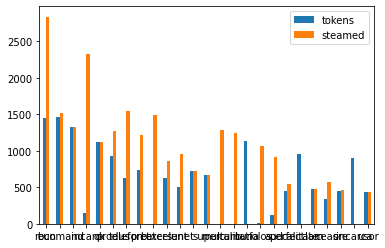

<Figure size 1800x720 with 0 Axes>

In [4]:
from lab_2.homework import plot_words
plot_words(all_positive_words, all_steamed_positive_words)

3) Plotati distributia numarului de tokens per review (nr. de reviews vs. nr. de tokens), atat pentru review-urile negative, cat si, separat, pentru cele pozitive. Ce observati?

In [11]:
_, __, negative_reviews_tokens = analyse_reviews(negative_reviews['reviews'])

Top 15 cuvinte cu stemul diferit de lema: 
 ['imposibilitatea', 'compatibilitatea', 'compatibilitatea', 'responsabilitatea', 'senzitivitatea', 'functionabilitatea', 'imposibilitatea', 'functionabilitatea', 'compatibilitatea', 'responabilitatea', 'nevandabilitatea', 'incompatibilitate', 'compatibilitate', 'incompatibilitate', 'eligibilitate']
Top 20 trigrame: 
 [('11777', '11878', '12080'), ('11878', '12080', '11575'), ('1580mah', '1624mah', '38v'), ('15min', 'browserfacebook', 'tweeeter'), ('1624mah', '38v', '592whr'), ('18650', '37v', '2600ma'), ('1st', 'tvuri', 'monitoare'), ('2004', '16mb', '128mb'), ('46v', '077a', '448v'), ('aermodelelor', 'reusim', 'aducem'), ('alipres', 'alibachinezarie', 'rectific'), ('amatori', 'sporturi', 'iarna'), ('anexat', 'captura', 'osciloscop'), ('apregiez', 'thumbsupemag', 'aztazi'), ('arm', '®', 'cortex'), ('artizanal', 'plotter', 'cutter'), ('ascend', 'y5', 'y560'), ('astra', 'gtc', 'batos'), ('baraiturile', 'paraiturile', 'pronuntate'), ('browserfac

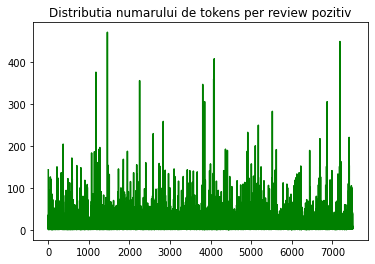

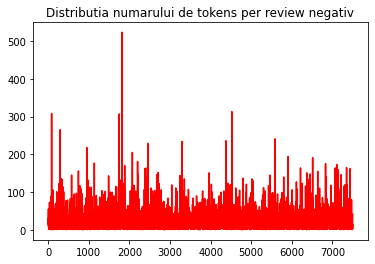

In [14]:
from matplotlib import pyplot as plt

plt.plot(range(len(positive_reviews_tokens)), [len(x) for x in positive_reviews_tokens], color='green')
plt.title('Distributia numarului de tokens per review pozitiv')
plt.show()
plt.plot(range(len(negative_reviews_tokens)), [len(x) for x in negative_reviews_tokens], color='red')
plt.title('Distributia numarului de tokens per review negativ')
plt.show()

# OBS: Review-urile negative au mai putine cuvinte in general